<div class='alert alert-block' style='background-color: #ffffff; border: 1px solid #333333; border-radius: 10px; padding: 20px; text-align: center;'> <h1 style='font-family: Arial, sans-serif; color: #000000; font-size: 36px;'>MACHINE LEARNING</h1> <h2 style='font-family: Arial, sans-serif; color: #333333; font-size: 28px;'>MDSAA-BA Program</h2> <hr style='border: 1px solid #555555;'> <h3 style='font-family: 'Open Sans', sans-serif; color: #666666; font-size: 24px;'>To Grant Or Not To Grant Project 2024/2025</h3> </div>

## Table of contents

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing the data](#2.-Importing-the-data)
3. [Exploring the data](#3.-Exploring-the-data)

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import missingno as msno

<br>

## 2. Importing the data

The `display.max_columns` option controls the number of columns to be printed. By setting the `display.max_columns` option to `None`, Pandas will display all columns in the DataFrame.

In [2]:
# Displays all columns of the dataset
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('/Users/mariananeto/Downloads/project_data/train_data.csv')
test = pd.read_csv('/Users/mariananeto/Downloads/project_data/test_data.csv')

/var/folders/pw/sbpycr1d17b1j4255gwjl17c0000gn/T/ipykernel_7442/890604039.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/mariananeto/Downloads/project_data/train_data.csv')


<br>

## 3. Exploring the data

### **1.3.1**  Applying the `.head()` and `.shape()` method

To take a first look into the data, it is used the method `.head()` method, so that the five first rows of every feature in the dataset is displayed.

In [4]:
train.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

With this method, the first five rows of data are visualized. It thus becomes easier to relate the variables to their respective values. It is, therefore possible to make a few first conclusions about the data, for instance:

- the variable `Claim Identifier` can be set as index;
- there are missing values in the data;
- there are different types of data: categorical (nominal and ordinal) and numerical (discrete and continuous);
- the target variable `Claim Injury Type` is ordinal.

Using the `.shape()` method we can check how many rows and columns the train and test dataset have.

In [5]:
print('The train dataset has ', train.shape[0], ' rows and ', train.shape[1], ' columns.')
print('The dataset with the new examples has ', test.shape[0], ' rows and ', test.shape[1], ' columns.')

The train dataset has  593471  rows and  33  columns.
The dataset with the new examples has  387975  rows and  30  columns.


From the output above, we can see that the train dataset has 593469 rows and 32 columns. While the test dataset has 387975  rows and  29  columns, 3 columns less than the train. This might suggest that the additional columns in the train data are not relevant for prediction.

<br>

### **1.3.2**  Checking duplicate values

#### **1.3.2.1**  Duplicate values in the `Claim Identifier` feature

Before we set the variable `Claim Identifier` as index its important to check first if there is duplicate values in the data. 

These two methods allow us to check if there is duplicated identifiers in the dataset. This is possible, since the `.duplicated()` method provides a list with boolean values for each row, having False if the row is not a duplicate and True otherwise. Then, the `.sum()` method sums all the values contained in that list (as False corresponds to the value 0 and True to the value 1).

In [6]:
print(train['Claim Identifier'].duplicated().sum())

1


There is duplicate values, so it is necessary to check the indexes with the respective duplicate claim identifier, in order to drop one of them.

In [7]:
pd.concat(identifier for _, identifier in train.groupby('Claim Identifier') if len(identifier) > 1)


Accident Date  Age at Injury Alternative Dispute Resolution  \
257901           NaN            NaN                            NaN   
526445           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
257901    2021-05-21                     NaN                  NaN         NaN   
526445    2022-09-05                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name Carrier Type  Claim Identifier  \
257901      NaN      NaN          NaN          NaN         292668076   
526445      NaN      NaN          NaN          NaN         292668076   

       Claim Injury Type County of Injury COVID-19 Indicator District Name  \
257901               NaN              NaN                NaN           NaN   
526445               NaN              NaN                NaN           NaN   

       First Hearing Date Gender  IME-4 Count  Industry Code  \
257901                NaN    NaN          NaN            NaN   
526445                NaN    NaN          NaN            NaN   

       Industry Code Description Medical Fee Region  \
257901                       NaN                NaN   
526445                       NaN                NaN   

        OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
257901                                 NaN                        NaN   
526445                                 NaN                        NaN   

       WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
257901                              NaN                         NaN   
526445                              NaN                         NaN   

       WCIO Nature of Injury Description  WCIO Part Of Body Code  \
257901                               NaN                     NaN   
526445                               NaN                     NaN   

       WCIO Part Of Body Description Zip Code  Agreement Reached WCB Decision  \
257901                           NaN      NaN                NaN          NaN   
526445                           NaN      NaN                NaN          NaN   

        Number of Dependents  
257901                   NaN  
526445                   NaN

From the output above, it is clear that the only different attribute is the `Assembly Date` for the remaining variables there is no information. Therefore, we proceed by deleting both records.

In [8]:
claimMode = train['Claim Identifier'].mode()
claimDateModeIndex = list(train[train['Claim Identifier'] == claimMode[0]].index)
claimDateModeIndex

[257901, 526445]

In [9]:
train.drop(claimDateModeIndex, inplace=True)

To make the use of these datasets more manageable, its index is defined as the feature `Claim Identifier` in the code below. 

In [10]:
train.set_index('Claim Identifier', inplace=True)
test.set_index('Claim Identifier', inplace=True)

<br>

#### **1.3.2.2**  Duplicate records in the dataset

Before proceeding, we check if there is any duplicated rows.

In [11]:
train[train.duplicated() == True]

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
363651794                  NaN            NaN                            NaN   
209507552                  NaN            NaN                            NaN   
970865999                  NaN            NaN                            NaN   
807753247                  NaN            NaN                            NaN   
395971406                  NaN            NaN                            NaN   
...                        ...            ...                            ...   
365870975                  NaN            NaN                            NaN   
327160035                  NaN            NaN                            NaN   
249875936                  NaN            NaN                            NaN   
120584215                  NaN            NaN                            NaN   
818961390                  NaN            NaN                            NaN   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
363651794           2020-01-01                     NaN                  NaN   
209507552           2020-01-01                     NaN                  NaN   
970865999           2020-01-01                     NaN                  NaN   
807753247           2020-01-01                     NaN                  NaN   
395971406           2020-01-01                     NaN                  NaN   
...                        ...                     ...                  ...   
365870975           2022-12-31                     NaN                  NaN   
327160035           2022-12-31                     NaN                  NaN   
249875936           2022-12-31                     NaN                  NaN   
120584215           2022-12-31                     NaN                  NaN   
818961390           2022-12-31                     NaN                  NaN   

                  Birth Year C-2 Date C-3 Date Carrier Name Carrier Type  \
Claim Identifier                                                           
363651794                NaN      NaN      NaN          NaN          NaN   
209507552                NaN      NaN      NaN          NaN          NaN   
970865999                NaN      NaN      NaN          NaN          NaN   
807753247                NaN      NaN      NaN          NaN          NaN   
395971406                NaN      NaN      NaN          NaN          NaN   
...                      ...      ...      ...          ...          ...   
365870975                NaN      NaN      NaN          NaN          NaN   
327160035                NaN      NaN      NaN          NaN          NaN   
249875936                NaN      NaN      NaN          NaN          NaN   
120584215                NaN      NaN      NaN          NaN          NaN   
818961390                NaN      NaN      NaN          NaN          NaN   

                 Claim Injury Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                         
363651794                      NaN              NaN                NaN   
209507552                      NaN              NaN                NaN   
970865999                      NaN              NaN                NaN   
807753247                      NaN              NaN                NaN   
395971406                      NaN              NaN                NaN   
...                            ...              ...                ...   
365870975                      NaN              NaN                NaN   
327160035                      NaN              NaN                NaN   
249875936                      NaN              NaN                NaN   
120584215                      NaN              NaN                NaN   
818961390                      NaN              NaN                NaN 

From the ouput above, we can see that there is 18348 duplicated rows and it is, also, clear that there exists a lot of rows with missing values in all features, except `Assembly Date`. This missingness in the data is, also, applied to the target variable `Claim Injury Type`. Since no useful information is provided by these rows, we will proceed by removing these observations.

Before proceeding to the removal, we check if there are more rows with missing values in the target variable.

In [12]:
print(f'There are {train[train['Claim Injury Type'].isna()].shape[0]} rows with missing values in the target feature, which corresponds to {round((train['Claim Injury Type'].isna().sum() / len(train)) * 100, 2)}% of the entire dataset.')


There are 19443 rows with missing values in the target feature, which corresponds to 3.28% of the entire dataset.


In [13]:
train.dropna(subset=['Claim Injury Type'], inplace=True)

Let's see if more duplicated rows can be found in the dataset.

In [14]:
train[train.duplicated(keep=False)]

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5686981                    NaN            0.0                              N   
5686771                    NaN            0.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5686981             2021-03-25                       Y                  0.0   
5686771             2021-03-25                       Y                  0.0   

                  Birth Year C-2 Date    C-3 Date               Carrier Name  \
Claim Identifier                                                               
5686981               1968.0      NaN  2021-03-16  ACE AMERICAN INSURANCE CO   
5686771               1968.0      NaN  2021-03-16  ACE AMERICAN INSURANCE CO   

                 Carrier Type Claim Injury Type County of Injury  \
Claim Identifier                                                   
5686981           1A. PRIVATE      1. CANCELLED          UNKNOWN   
5686771           1A. PRIVATE      1. CANCELLED          UNKNOWN   

                 COVID-19 Indicator District Name First Hearing Date Gender  \
Claim Identifier                                                              
5686981                           N           NYC         2022-10-24      M   
5686771                           N           NYC         2022-10-24      M   

                  IME-4 Count  Industry Code Industry Code Description  \
Claim Identifier                                                         
5686981                   NaN            NaN                       NaN   
5686771                   NaN            NaN                       NaN   

                 Medical Fee Region  OIICS Nature of Injury Description  \
Claim Identifier                                                          
5686981                          UK                                 NaN   
5686771                          UK                                 NaN   

                  WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                               
5686981                                 NaN                              NaN   
5686771                                 NaN                              NaN   

                  WCIO Nature of Injury Code  \
Claim Identifier                               
5686981                                  NaN   
5686771                                  NaN   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
5686981                                        NaN                     NaN   
5686771                                        NaN                     NaN   

                 WCIO Part Of Body Description Zip Code  Agreement Reached  \
Claim Identifier                                                             
5686981                                    NaN    07032                0.0   
5686771                                    NaN    07032                0.0   

                      WCB Decision  Number of Dependents  
Claim Identifier                                          
5686981           Not Work Related                   0.0  
5686771           Not Work Related                   0.0

We identified a single duplicated row, differing only in its index. Therefore, we will proceed to delete one of the duplicates.

In [15]:
train.drop_duplicates(keep='first', inplace=True)

<br>

#### **1.3.3** Applying the `.info()` method

The `` .info() `` method provides more information about the dataset, including the existence of missing values and the data type of the elements of each row.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574025 entries, 5393875 to 6165075
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574025 non-null  float64
 2   Alternative Dispute Resolution      574025 non-null  object 
 3   Assembly Date                       574025 non-null  object 
 4   Attorney/Representative             574025 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544947 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187244 non-null  object 
 9   Carrier Name                        574025 non-null  object 
 10  Carrier Type                        574025 non-null  object 
 11  Claim Injury Type       

From the output above we can get some insights: 
- some features have missing values;
- the variable `OIICS Nature of Injury Description` has no values;
- 11 variables are numerical and 21 categorical.

By applying the `.unique()` method on the variable `OIICS Nature of Injury Description` we get all the unique (non-duplicate) values of the column. We do this to confirm the insight taken above, that no values are present.

In [17]:
train['OIICS Nature of Injury Description'].unique()

array([nan])

From the output it is clear the column has missing values. Given the lack of meaningful data in this column, it will be removed from the dataset.

In [18]:
# axis = 1 specifies that we're dropping a column, not rows.
# inplace = True deletes the column without having to reassign `train`.
train.drop('OIICS Nature of Injury Description', axis = 1, inplace = True)

<br>

#### **1.3.4** Descriptive Statistics

By using the `.describe()` method we get different statistical measurements, such as mean and standard deviation, for the various features. By examining these statistics, we can gain insights into the distribution of the data, helping to identify anomalies.

##### 1.3.4.1 Numerical Features

By default, the .describe() method focuses on the numerical features of the dataset. We will begin our analysis with these features to gain insights into their characteristics and distributions.

In [19]:
train.describe()

Age at Injury  Average Weekly Wage     Birth Year    IME-4 Count  \
count  574025.000000         5.453740e+05  544947.000000  132803.000000   
mean       42.114343         4.910892e+02    1886.767454       3.207337   
std        14.256336         6.092924e+03     414.644789       2.832303   
min         0.000000         0.000000e+00       0.000000       1.000000   
25%        31.000000         0.000000e+00    1965.000000       1.000000   
50%        42.000000         0.000000e+00    1977.000000       2.000000   
75%        54.000000         8.410000e+02    1989.000000       4.000000   
max       117.000000         2.828079e+06    2018.000000      73.000000   

       Industry Code  WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
count  564068.000000              558386.000000               558369.000000   
mean       58.645305                  54.381143                   41.013839   
std        19.644175                  25.874281                   22.207521   
min        11.000000                   1.000000                    1.000000   
25%        45.000000                  31.000000                   16.000000   
50%        61.000000                  56.000000                   49.000000   
75%        71.000000                  75.000000                   52.000000   
max        92.000000                  99.000000                   91.000000   

       WCIO Part Of Body Code  Agreement Reached  Number of Dependents  
count           556944.000000      574025.000000         574025.000000  
mean                39.738146           0.046665              3.006564  
std                 22.365940           0.210921              2.000799  
min                 -9.000000           0.000000              0.000000  
25%                 33.000000           0.000000              1.000000  
50%                 38.000000           0.000000              3.000000  
75%                 53.000000           0.000000              5.000000  
max                 99.000000           1.000000              6.000000

Observations:

- The feature `Age at Injury` has a minimum age of 0 and a maximum age of 117, which is completly impossible. Therefore, these can be considered as inconsistencies in the data;
- The feature `Average Weekly Wage` has a standard deviation of approximatly 6092.92 monetary units which is very dispersed to the mean (491.09 monetary units), this means that there is a wide range in weekly wages, maybe due to outliers. Also, from the median we can see that 50% of the individuals have no salary, maybe because it was never reported when filling the claim. The maximum statistic shows that the maximum average weekly wage is 2828079, this might represent an outlier.
- The feature `Birth Year` suggests that there is a lot of inconsistencies in the year of birth. The mean birth year appears to be 1886.77, which is extremely low, meaning that we would have people with more than 100 years. It, also, has a large standard deviation, due to significant discrepancies in the data. 
- At least 2 IME-4 forms received per claim. From the `IME-4 Count`, we can see that the maximum number of claims received is 73, which can represent an outlier.
- From the feature `Agreement Reached` we can see that most of the agreements were not satisfied.
- On average, individuals have about three dependents, with the maximum being 6.

<br>

##### 1.3.4.2 Categorical Features

Next, we will examine the statistics for the categorical data. To achieve this, we will use the include parameter and set it to object. This will provide a summary that includes the count of entries, the number of unique values, the most frequent value, and the frequency of that top value for each categorical column.

In [20]:
train.describe(include=object)

Accident Date Alternative Dispute Resolution Assembly Date  \
count         570337                         574025        574025   
unique          5539                              3           897   
top       2020-03-01                              N    2020-03-06   
freq            1245                         571411          1413   

       Attorney/Representative    C-2 Date    C-3 Date          Carrier Name  \
count                   574025      559466      187244                574025   
unique                       2        2475        1648                  2046   
top                          N  2021-05-11  2021-04-21  STATE INSURANCE FUND   
freq                    392291        1847         350                111144   

       Carrier Type Claim Injury Type County of Injury COVID-19 Indicator  \
count        574025            574025           574025             574025   
unique            8                 8               63                  2   
top     1A. PRIVATE       2. NON-COMP          SUFFOLK                  N   
freq         285367            291078            60430             546504   

       District Name First Hearing Date  Gender  \
count         574025             150797  574025   
unique             8               1094       4   
top              NYC         2022-04-15       M   
freq          270778                440  335217   

                Industry Code Description Medical Fee Region  \
count                              564068             574025   
unique                                 20                  5   
top     HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
freq                               114339             265981   

       WCIO Cause of Injury Description WCIO Nature of Injury Description  \
count                            558386                            558369   
unique                               74                                56   
top                             LIFTING                    STRAIN OR TEAR   
freq                              46610                            153373   

       WCIO Part Of Body Description Zip Code      WCB Decision  
count                         556944   545388            574025  
unique                            54    10060                 1  
top                  LOWER BACK AREA    11236  Not Work Related  
freq                           51862     3302            574025

Observations:

- From the feature `Accident Date`, we can check that March 1, 2020 is the most common accident date, occurring 1245 times. This might suggest a possible concentration of injuries around that time; 

- From the feature `Alternative Dispute Resolution`, we can check that the vast majority of cases did not involve alternative dispute resolution (571 412 times); 

- The feature `Attorney/Representative` has 2 unique values, with 'N' (No) as the predominant value (392 291), indicating that many claimants did not have legal representation;

- The most predominant carrier (`Carrier Name`) is `STATE INSURANCE FUND`;

- With 8 unique carrier types (`Carrier Type`), `1A. PRIVATE` is the most frequent (285 368), indicating a prevalence of private insurance providers;

- The target variable (`Claim Injury Type`) has as the predominant claim type `2. NON-COMP`;

- The vast majority of cases were not related to COVID-19;

- Higher incidence of workplace injuries among males (335 218);

- From the `Industry Code Description`, we can check that `HEALTH CARE AND SOCIAL ASSISTANCE` classification is the most common (114 339 times), indicating a high frequency of injuries in this sector;

- `LIFTING` is the most frequently reported cause of injury (153 373 times);

- `STRAIN OR TEAR` is the most frequently reported nature of injury (153 373 times);

- `LOWER BACK AREA` is the most frequently reported injury location (51862 times);

- The `WCB Decision` feature shows only 1 unique value, `Not Work Related`, indicating the same categorization of claims in the data.


<br>

## 3. Data Preparation

### 3.1 Coherence Checking

Before splitting the data into training and validation sets and performing further pre-processing steps, such as imputing missing values, we will first check the consistency of the data. Based on previous insights, we have identified potential inconsistencies in some features. For example, there are individuals over 100 years old and babies applying for compensation benefits, which is highly unlikely and suggests data incoherence. Additionally, we may encounter missing values in some columns, as well as the presence of outliers or leverage points, all of which will be analyzed later.

Firstly, the missing values in the data are analysed. Then, we will proceed by analysing inconsistencies in some columns.

<br>

#### 3.1.1 Missing Values

Earlier, we checked that the column `Birth Year` contains some rows with a value of 0. Therefore, we will replace those values with NaN.

In [21]:
print(f'There are {train[train['Birth Year'] == 0].shape[0]} rows with a value of 0 in the "Birth Year" column.')

There are 25081 rows with a value of 0 in the "Birth Year" column.


In [22]:
train['Birth Year'] = train['Birth Year'].replace(0, np.nan)

 To analyze missing values in the dataset, we can call the `missing_value_summary` function. This function identifies the columns with missing data, counts the unique values in each column, determines the number of missing values, and calculates the percentage of missing values relative to the entire dataset.

In [23]:
def missing_value_summary(dataframe):
    nan_columns = dataframe.columns[dataframe.isna().any()].tolist()
    
    summary_data = []
    
    for column in nan_columns:

        nan_number = dataframe[column].isna().sum()

        nan_percentage = (nan_number / len(dataframe)) * 100

        unique_values = dataframe[column].nunique()
        
        summary_data.append({
            'Unique Values': unique_values,
            'NaN Values': nan_number,
            'Percentage NaN': nan_percentage
        })
    
    summary = pd.DataFrame(summary_data, index=nan_columns)
    
    return summary


In [24]:
# Calling the 'missing_value_summary' function on the 'train' dataset.
missing_value_summary(train)


Unique Values  NaN Values  Percentage NaN
Accident Date                               5539        3688        0.642481
Average Weekly Wage                       120024       28651        4.991246
Birth Year                                   106       54159        9.434955
C-2 Date                                    2475       14559        2.536301
C-3 Date                                    1648      386781       67.380515
First Hearing Date                          1094      423228       73.729890
IME-4 Count                                   41      441222       76.864596
Industry Code                                 24        9957        1.734593
Industry Code Description                     20        9957        1.734593
WCIO Cause of Injury Code                     77       15639        2.724446
WCIO Cause of Injury Description              74       15639        2.724446
WCIO Nature of Injury Code                    56       15656        2.727407
WCIO Nature of Injury Description             56       15656        2.727407
WCIO Part Of Body Code                        57       17081        2.975654
WCIO Part Of Body Description                 54       17081        2.975654
Zip Code                                   10060       28637        4.988807

Columns such as `First Hearing Date` (73.73% missing), `IME-4 Count` (76.86%), and `C-3 Date` (67.38%) exhibit high percentages of missing data. In contrast, `Industry Code` and `Industry Code Description` exhibit lower percentages of missing values (1.73%). It is evident that whenever a code is missing, the corresponding description is also absent. Further analysis will be conduct to explore the relationships between missing values across column pairs.


Overall, the presence of missing data in these columns suggests a need for data imputation strategies. However, this step will only be done after the splitting of the data, in order to avoid data leakage.

We can visualize and analyse missing values by using the library `missingno`. This library provides different visualizations, such as heatmaps and dendograms, that help us in identifying and understanding patterns of missingness in data.

1. `Missingno` Bar Chart

Below we have plotted the count of values per column, organized in ascending order. This means that columns with the lowest values are positioned at the beginning, followed by those with higher counts.

<Axes: >

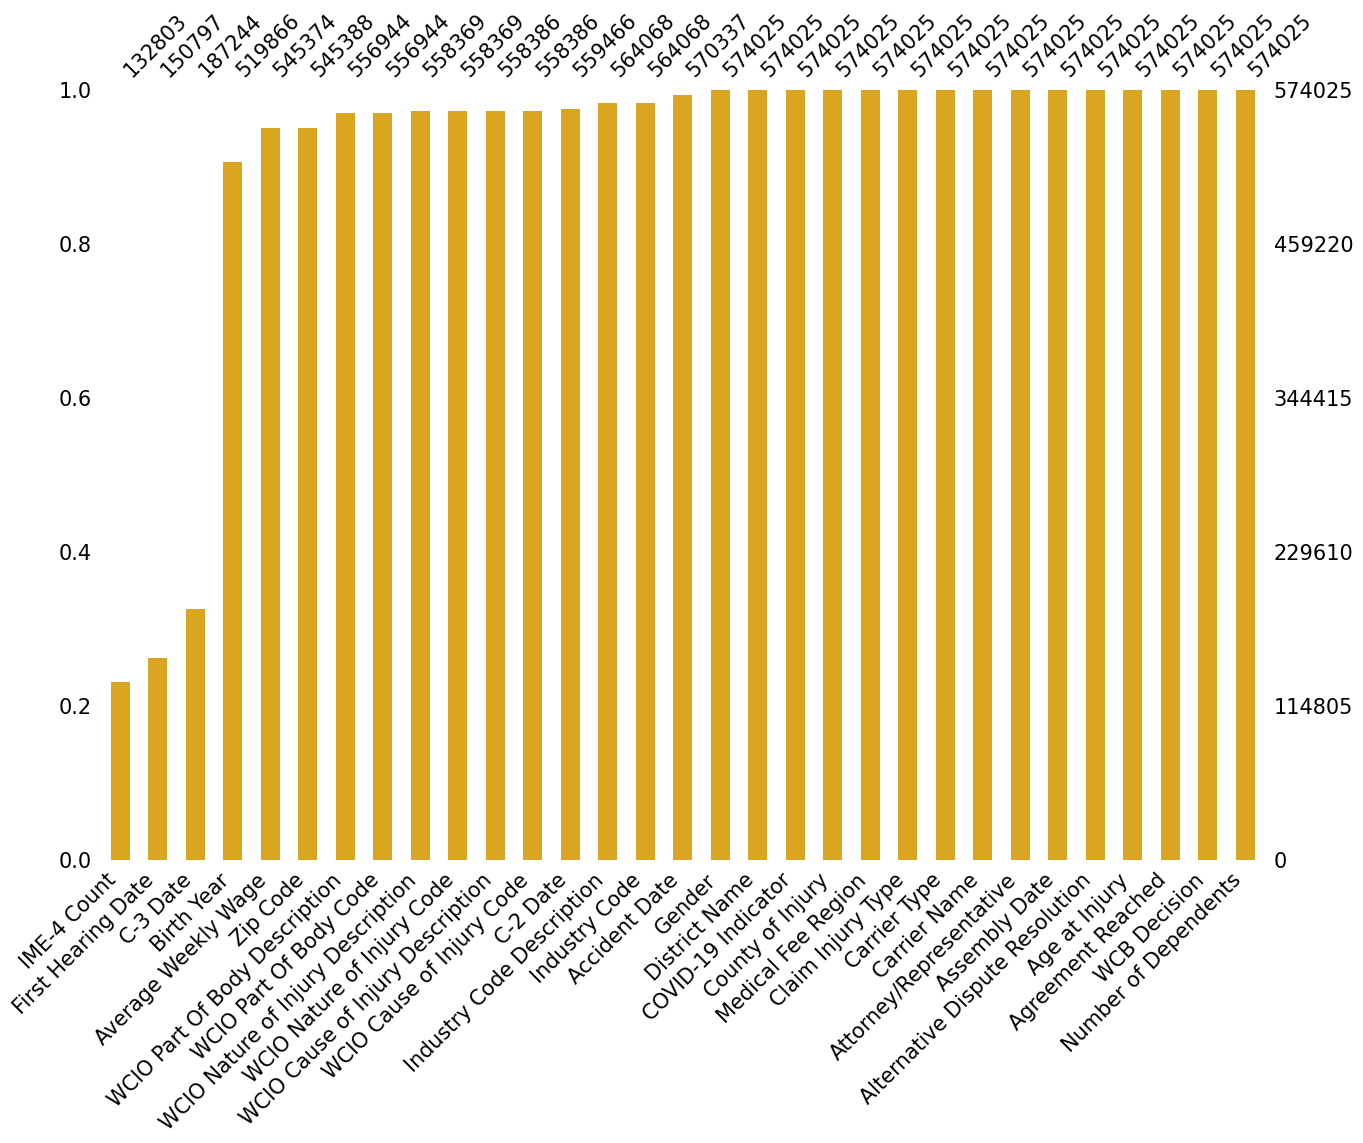

In [25]:
msno.bar(train, figsize=(15, 10), fontsize=15, color='goldenrod', sort='ascending')

2. `Missingno` Heatmap visualization

We can also use the `missingno` library to explore the relationships between missing values across column pairs. By analyzing the nullity correlation, we can identify columns whose missing data are either directly or inversely related. In this analysis, only columns with missing values are considered.

A nullity correlation value close to 1 indicates a strong positive relationship, meaning that if one column has a missing value, the other is likely to have one as well. On the other hand, a correlation value near -1 suggests a strong inverse relationship, where one column is missing values while the other is not. Values around zero indicate no significant correlation between the missing data in the two columns.

<Axes: >

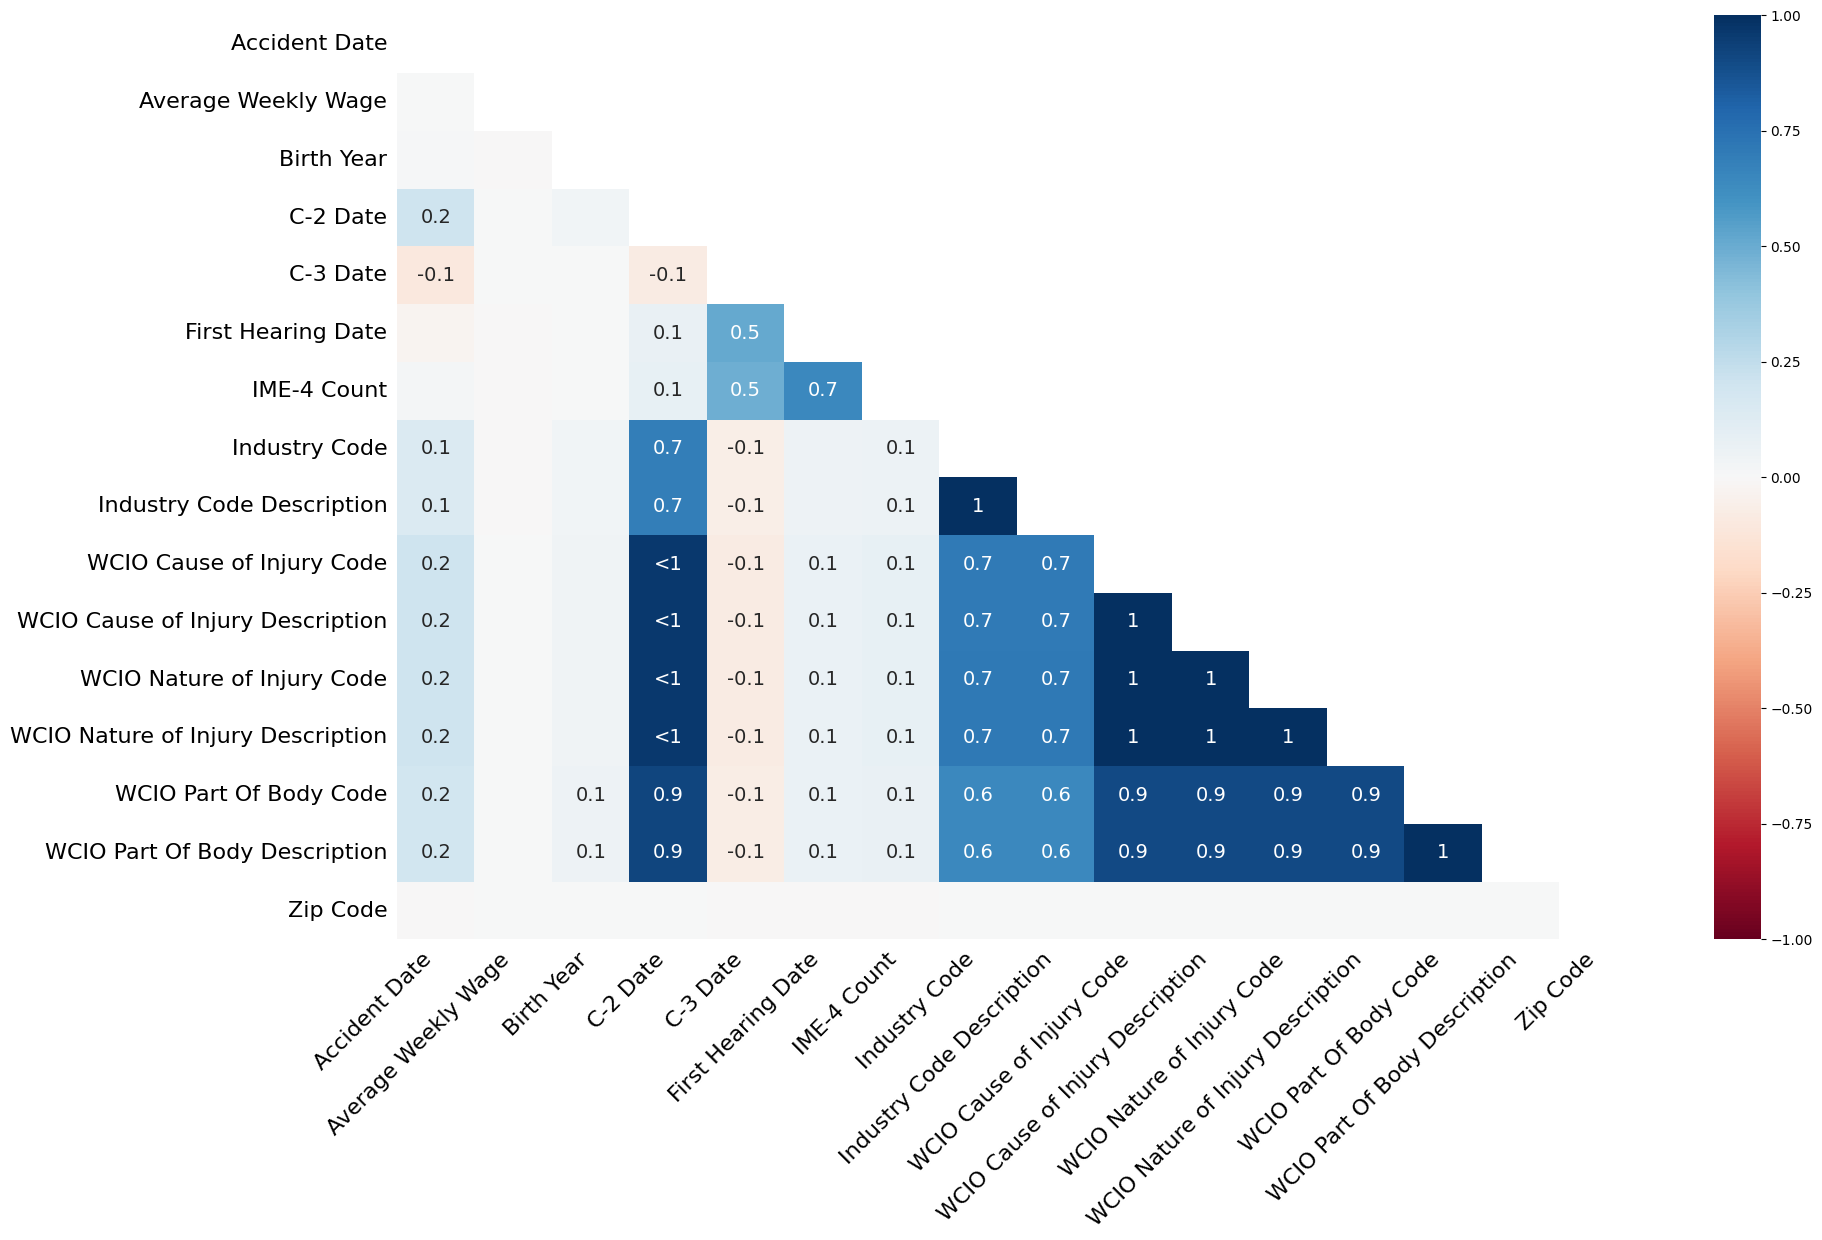

In [26]:
msno.heatmap(train)

Correlations:

- WCIO related codes (Cause of Injury, Nature of Injury, Part of Body) and their descriptions show perfect correlations (value of 1). This indicates that if data is missing in one of these fields, it is also missing in the corresponding description fields - Missing Not At Random (MNAR); 

- `Industry Code` and `Industry Code Description` also show a strong positive correlation of 1 - Missing Not At Random (MNAR);

- `Industry Code` and `Industry Code Description` have a strong positive correlation with all WCIO related codes and descriptions, 0.7 and 0.6 for the Part of Body code and description;

- 'C-2 Date' has a very strong correlation, near 1, with all WCIO related codes and description. It also has with 'Industry Code' and 'Industry Code Description' a correlation of 0.7;

- Some features like 'Average Weekly Wage', 'Birth Year' and 'Zip Code' have very weak correlations (close to zero), indicating they are missing independently of other variables - Missing Completely at Random (MCAR);

- 'First Hearing Date', 'IME-4 Count' and 'C-3 Date' have strong correlation with most variables, some positive others negative. However, from the previous analysis we saw that these variables have the highest number of missing values, hence these correlations might be trivial.

<br>

#### 3.1.2 Inconsistent Values

##### 3.1.2.1 `Age at Injury`

In [27]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import numpy as np

output_notebook()

hist, edges = np.histogram(train['Age at Injury'], bins=40)

p = figure(title='Histogram of Age at Injury')

p.quad(
    top=hist,
    bottom=0,
    left=edges[:-1],
    right=edges[1:],
    fill_color='#FF8C00',
    line_color='black',      
    line_width=1 
)

# Display the plot in the notebook
show(p)


Loading BokehJS ...

In a previous analysis, we identified some inconsistencies in the 'Age at Injury' column, where certain values did not seem to make sense. The histogram above shows the distribution of ages, revealing that some individuals are reported to be younger than 15 or older than 90. These values are considered inconsistent, as it is unlikely that people within these age ranges would be actively working.

<br>

##### 3.1.2.2 `Accident Date`

To allow pandas to recognize the `Accident Date` column as a datetime type, we convert its values using the `to_datetime()` function. 

In [28]:
train['Accident Date'] = pd.to_datetime(train['Accident Date'])

This enables us to use methods like `describe()` to generate statistical summaries of the column. Through this, we can easily identify the earliest and latest dates in the dataset.

In [29]:
train['Accident Date'].describe()

count                           570337
mean     2021-04-28 21:00:27.892982784
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-21 00:00:00
max                2023-09-29 00:00:00
Name: Accident Date, dtype: object

The earliest recorded accident occurred on the 6th of September of 1961, while the most recent incident was on 29th of September of 2023. Additionally, half of the accidents occurred on or before 27th of June of 2021.

In order to have the different components of the date (year, month and day), we are going to split the column `Accident Date` into three columns. We then proceed to remove the column from the dataset.

In [30]:
print(train['Accident Date'].dtype)

datetime64[ns]


In [31]:
train['Accident Year'] = train['Accident Date'].apply(lambda x: x.year)
train['Accident Month'] = train['Accident Date'].apply(lambda x: x.month)
train['Accident Day'] = train['Accident Date'].apply(lambda x: x.day)

In [32]:
train = train.drop(columns = 'Accident Date')

One aspect that is important to check is if the age at injury aligns with the difference between the accident date and the birth year. We had already seen that the feature `Age at Injury` has inconsistent values, therefore this mismatch might occur.

In [33]:
train.apply(lambda row: row['Accident Year'] - row['Birth Year'] == row['Age at Injury'], axis=1).value_counts()

False    300700
True     273325
Name: count, dtype: int64

From the output above, we can see that in 300 700 claims, there was a misalignment between the calculated age and the recorded age at the time of injury.

In [34]:
(train['Accident Year'] - train['Birth Year'] - train['Age at Injury']).value_counts()

 0.0      273325
 1.0      242970
-1.0         294
 119.0        84
 118.0         7
 120.0         2
Name: count, dtype: int64

The output above illustrates the differences in ages calculated from the `Accident Year`, `Birth Year`, and `Age at Injury`. Most differences are minor, with the majority falling within a 1-year difference. However, there are also significant anomalies where some records show a difference of more than 100 years. Also, there is some values that cannot be calculated due to missing values in some of these columns.

Given the inconsistencies and missing values in the date related data, these issues will be addressed in the missing value handling step. Additionally, during feature selection, we will carefully evaluate each feature to identify the least reliable ones, which may need to be excluded from the model.

<br>

##### 3.1.2.4 `Average Weekly Wage`

From previous insights, we saw that there is a significant variation in income levels among individuals in our dataset. A notable number of individuals have reported no income, which heavily influences the mean. However, there are also individuals with very high average weekly wages, some of millions. 

In the boxplot below, the distribution of the `Average Weekly Wage` is visually represented.

In [35]:
import plotly.express as px

fig = px.box(train, x='Average Weekly Wage')

fig.update_traces(marker_color='red',  
                  line_color='black')
fig.show()

In [36]:
"""# Trimming / Capping
## https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

percentile25 = train['Average Weekly Wage'].quantile(0.25)
percentile75 = train['Average Weekly Wage'].quantile(0.75)

iqr = percentile75 - percentile25


upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

train[train['Average Weekly Wage'] > upper_limit]
train[train['Average Weekly Wage'] < lower_limit]

new_df = train[train['Average Weekly Wage'] < upper_limit]
new_df.shape

new_df_cap = train.copy()
new_df_cap['Average Weekly Wage'] = np.where(
    new_df_cap['Average Weekly Wage'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Average Weekly Wage'] < lower_limit,
        lower_limit,
        new_df_cap['Average Weekly Wage']))"""

"# Trimming / Capping\n## https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/\n\npercentile25 = train['Average Weekly Wage'].quantile(0.25)\npercentile75 = train['Average Weekly Wage'].quantile(0.75)\n\niqr = percentile75 - percentile25\n\n\nupper_limit = percentile75 + 1.5 * iqr\nlower_limit = percentile25 - 1.5 * iqr\n\ntrain[train['Average Weekly Wage'] > upper_limit]\ntrain[train['Average Weekly Wage'] < lower_limit]\n\nnew_df = train[train['Average Weekly Wage'] < upper_limit]\nnew_df.shape\n\nnew_df_cap = train.copy()\nnew_df_cap['Average Weekly Wage'] = np.where(\n    new_df_cap['Average Weekly Wage'] > upper_limit,\n    upper_limit,\n    np.where(\n        new_df_cap['Average Weekly Wage'] < lower_limit,\n        lower_limit,\n        new_df_cap['Average Weekly Wage']))"

In order to reduce the skewness of the variable `Average Weekly Wage` a logarithm transformation will be applied. By converting the wages to their logarithmic values, we can mitigate the impact of extreme values.

In [37]:
train['Average Weekly Wage'] = np.log10(train['Average Weekly Wage'] + 1 )

We add 1 to the whole column to avoid taking the logarithm of zero, which is undefined.

In [38]:
train['Average Weekly Wage'].describe()

count    545374.000000
mean          1.158958
std           1.474437
min           0.000000
25%           0.000000
50%           0.000000
75%           2.925312
max           6.451492
Name: Average Weekly Wage, dtype: float64

The summary statistics for the logarithmic transformation of the `Average Weekly Wage` still reveals a distribution characterized by a significant number of individuals reporting zero or very low wages, as indicated by the mean, approximately 1.16, and a median of 0. Additionally, the low standard deviation (1.47) suggests less variability in wage.

In [39]:
import plotly.express as px

fig = px.box(train, x='Average Weekly Wage')

fig.update_traces(marker_color='red',  
                  line_color='black')
fig.show()

<Axes: xlabel='Average Weekly Wage', ylabel='Count'>

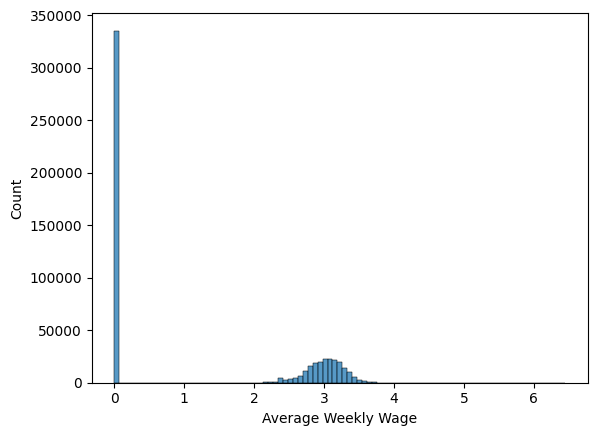

In [40]:
sns.histplot(train['Average Weekly Wage'])

<br>

##### 3.1.2.5 `WCIO codes`

Since our dataset includes both the WCIO code and its corresponding description, we will create a lookup table to reference the code and description as needed. Therefore, we will remove the columns that contain redundant descriptions, as there is already a column with the codes that provides the same information.

##### 3.1.2.5.1 `WCIO Cause Of Injury`

In [41]:
def create_lookup(dataframe, code_column, description_column):
    lookup = dataframe[[code_column, description_column]].drop_duplicates()
    lookup = lookup.reset_index(drop=True)
    lookup[code_column] = lookup[code_column].astype('Int64')
    lookup = lookup.sort_values(by=code_column).reset_index(drop=True)
    
    return lookup


Creating a lookup table for `WCIO Cause Of Injury`.

In [42]:
WCIO_cause_Lookup = create_lookup(train, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Removing from the dataset the corresponding description column.

In [43]:
train = train.drop(columns=['WCIO Cause of Injury Description'])

<br>

##### 3.1.2.5.2 `WCIO Nature Of Injury`

Creating a lookup table for `WCIO Nature Of Injury`.

In [44]:
WCIO_nature_Lookup = create_lookup(train, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')

Removing from the dataset the corresponding description column.

In [45]:
train = train.drop(columns=['WCIO Nature of Injury Description'])

<br>

##### 3.1.2.5.3 `WCIO Part of Body `

Creating a lookup table for `WCIO Part of Body`.

In [46]:
WCIO_bodyPart_Lookup = create_lookup(train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Removing from the dataset the corresponding description column.

In [47]:
train = train.drop(columns=['WCIO Part Of Body Description'])

<br>

#### 3.1.3 Target Definition

The target variable, `Claim Injury Type`, is an ordinal feature with values ranging from 1 to 8, representing different injury classifications. To enhance analysis, we will split the `Claim Injury Type` into two separate features:
- `Injury Magnitude`: This will capture the numerical part of the classification (1-8);
- `Injury Type`: This will have the descriptive part of the classification.

After the transformation, we will delete the original columns `Injury Type` and `Claim Injury Type`.

In [48]:
train[['Injury Magnitude', 'Injury Type']] = train['Claim Injury Type'].str.split('.', expand=True)

Before deleting both variables, we are goint to create a lookup table.

In [49]:
ClaimInjuryLookup = create_lookup(train, 'Injury Magnitude', 'Injury Type')
ClaimInjuryLookup

Injury Magnitude    Injury Type
0                 1      CANCELLED
1                 2       NON-COMP
2                 3       MED ONLY
3                 4      TEMPORARY
4                 5   PPD SCH LOSS
5                 6        PPD NSL
6                 7            PTD
7                 8          DEATH

Deleting the columns `Injury Type` and `Claim Injury Type`.

In [50]:
train = train.drop(columns=['Injury Type', 'Claim Injury Type'])


To prepare for model training and validation, we first need to create two distinct datasets. The first dataset will consist of all the independent variables, referred to as `x`, while the second dataset will contain the dependent variable, `y`. This separation will allows us to effectively train our model and evaluate its performance on unseen data.

In [51]:
x = train.drop(columns= 'Injury Magnitude')
y = train['Injury Magnitude']

<Axes: xlabel='Injury Magnitude', ylabel='Count'>

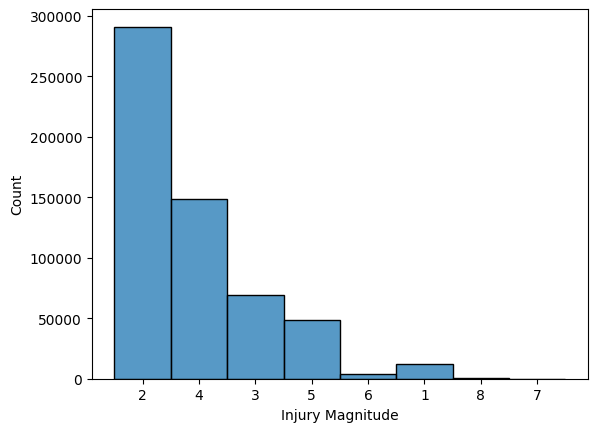

In [52]:
sns.histplot(y)

The plot above clearly indicates that we are facing a class imbalance problem. Specifically, the `Injury Magnitude` category labeled as 2 is the most prevalent.

<br>

## 4. Data Partitioning

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify = y.unique, test_size= 0.2,shuffle=True)

<Axes: xlabel='Injury Magnitude', ylabel='Count'>

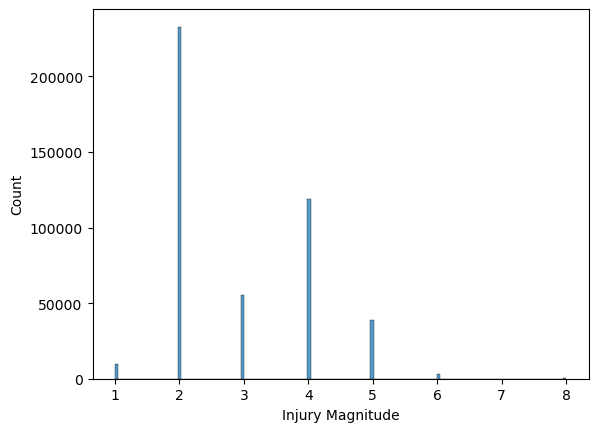

In [94]:
sns.histplot(y_train)

# These codes need to be after train-test split

In [22]:
# create list of numerical column

train['Age'] = 2024 - train['Birth Year']
num_col = train.select_dtypes(include=np.number).columns


In [ ]:
train['IME-4 Count'].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

Assuming that the missing values in ÌME-4 Count` means 0 claims received.

In [ ]:
# Assuming you already have the 'train' DataFrame loaded
train['IME-4 Count'].fillna(0, inplace=True)


/var/folders/n8/08b2nd114jdfnsydb_4mj4fw0000gn/T/ipykernel_18366/4151862049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["IME-4 Count"].fillna(0, inplace=True)
